# Network Analysis of Vincent Kaminski's Outgoing E-Mails

In [1]:
import pandas as pd

# network analysis
import networkx as nx

# plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('whitegrid')
import plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from wordcloud import WordCloud, STOPWORDS

In [2]:
# load data
kaminski_parsed = pd.read_csv('../data/kaminski_parsed.csv')
kaminski_edges = pd.read_csv('../data/kaminski_edges.csv')
to_kaminski_edges = pd.read_csv('../data/to_kaminski_edges.csv')

## Network Visualization

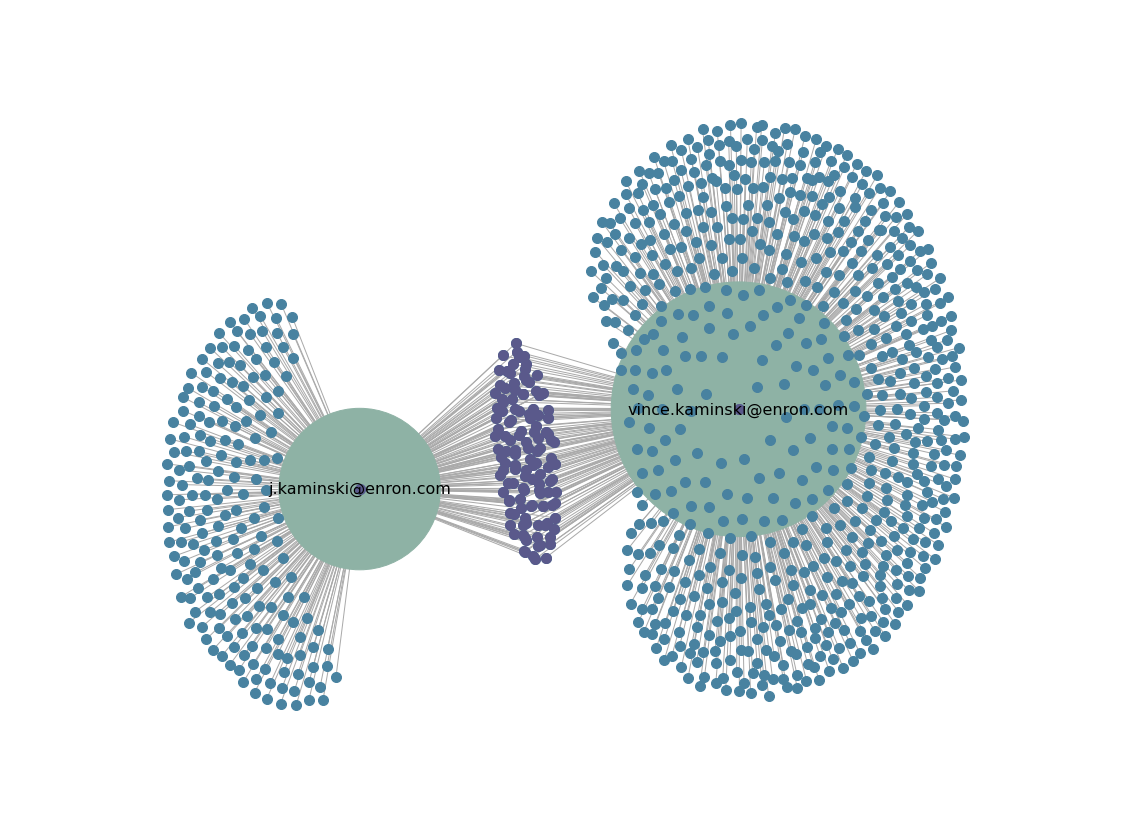

In [6]:
# create network graph for Kaminski
G_kam = nx.from_pandas_edgelist(kaminski_edges, 'sender', 'recipient', 
                                edge_attr='num_emails')
fig_kam = plt.figure(figsize=(20, 15))

# create a layout for the nodes
layout_kam = nx.spring_layout(G_kam, iterations=50)

# draw the edges
nx.draw_networkx_edges(G_kam, layout_kam, edge_color='#AAAAAA')

# create and draw sender nodes, sized according to their number of connections
sender_kam = [node for node in G_kam.nodes() if node in kaminski_edges['sender'].unique()]
size_kam = [G_kam.degree(node) * 80 for node in G_kam.nodes() if node in kaminski_edges['sender'].unique()]
nx.draw_networkx_nodes(G_kam, layout_kam, nodelist=sender_kam, node_size=size_kam, node_color='#8EB2A5')

# create and draw all recipient nodes
recipients_kam = [node for node in G_kam.nodes() if node in kaminski_edges['recipient'].unique()]
nx.draw_networkx_nodes(G_kam, layout_kam, nodelist=recipients_kam, node_size=100, node_color='#4882A0')

# create and draw popular recipients
high_degree_recipients_kam = [node for node in G_kam.nodes() if node in kaminski_edges['recipient'].unique() 
                              and G_kam.degree(node) > 1]
nx.draw_networkx_nodes(G_kam, layout_kam, nodelist=high_degree_recipients_kam, node_size=100, node_color='#5A598B')

# label the sender nodes
sender_dict_kam = dict(zip(sender_kam, sender_kam))
nx.draw_networkx_labels(G_kam, layout_kam, font_size=16, labels=sender_dict_kam)

plt.axis('off')
#plt.title('Network of Vincent Kaminski\'s Outgoing Emails')
#plt.legend()
plt.margins(x=0.2, y=0.2, tight=False)
plt.rcParams.update({'font.size': 36})
plt.show()
fig_kam.savefig('../plots/kaminski_network.png')

## Kaminskis Top10 Network

In [3]:
kaminski_top10 = kaminski_edges.head(10)
kaminski_top10['weight'] = kaminski_top10['num_emails'] / kaminski_top10['num_emails'].sum()
kaminski_top10

/home/agnes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,sender,recipient,num_emails,weight
0,vince.kaminski@enron.com,vince.kaminski@enron.com,4559,0.408952
1,vince.kaminski@enron.com,vkaminski@aol.com,2754,0.247040
2,vince.kaminski@enron.com,shirley.crenshaw@enron.com,1446,0.129709
3,vince.kaminski@enron.com,stinson.gibner@enron.com,712,0.063868
4,j.kaminski@enron.com,vkaminski@aol.com,591,0.053014
5,vince.kaminski@enron.com,vasant.shanbhogue@enron.com,308,0.027628
6,vince.kaminski@enron.com,mike.roberts@enron.com,231,0.020721
7,vince.kaminski@enron.com,grant.masson@enron.com,200,0.017940
8,vince.kaminski@enron.com,pinnamaneni.krishnarao@enron.com,175,0.015698
9,j.kaminski@enron.com,shirley.crenshaw@enron.com,172,0.015429


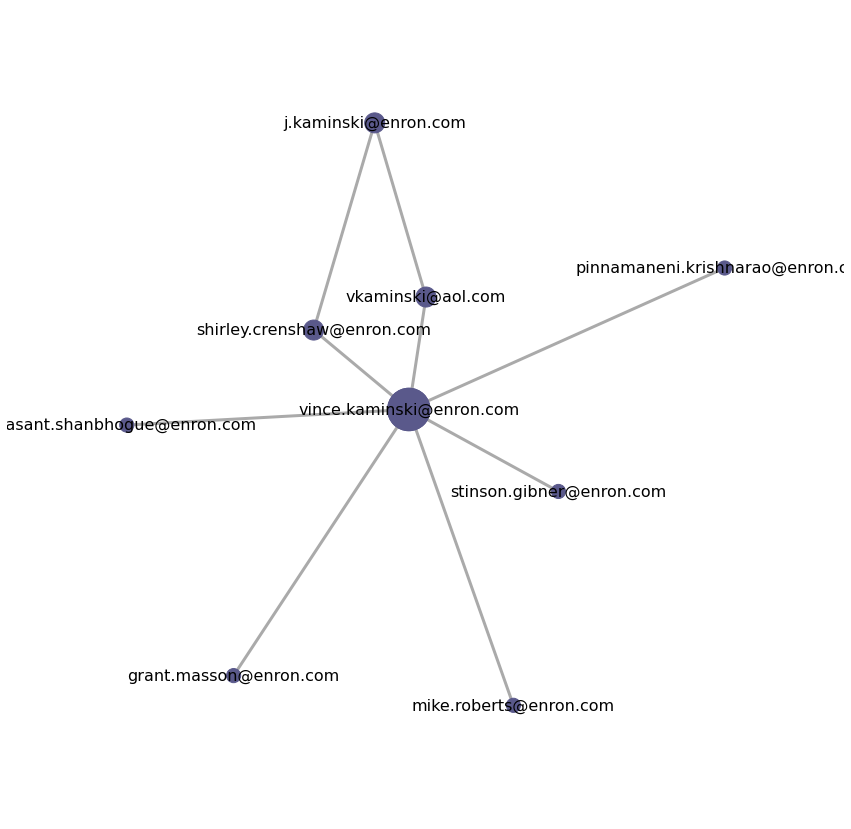

In [7]:
# create network graph for Kaminski Top10 network
G_top = nx.from_pandas_edgelist(kaminski_top10, 'sender', 'recipient', 
                                edge_attr='num_emails')
fig_top = plt.figure(figsize=(15, 15))

# create a layout for the nodes
layout_top = nx.spring_layout(G_top, k=0.3, iterations=80, weight='num_emails')

# draw the edges
nx.draw_networkx_edges(G_top, layout_top, width=3, edge_color='#AAAAAA')

# create and draw sender nodes, sized according to their number of connections
sender_top = [node for node in G_kam.nodes() if node in kaminski_top10['sender'].unique()]
size_top = [G_top.degree(node) * 200 for node in G_top.nodes() if node in kaminski_top10['sender'].unique()]
nx.draw_networkx_nodes(G_top, layout_top, nodelist=sender_top, node_size=size_top, node_color='#5A598B', 
                       label=kaminski_top10['sender'].unique())

# create and draw all recipient nodes
recipients_top = [node for node in G_top.nodes() if node in kaminski_top10['recipient'].unique()]
size_rec = [G_top.degree(node) * 200 for node in G_top.nodes() if node in kaminski_top10['recipient'].unique()]
nx.draw_networkx_nodes(G_top, layout_top, nodelist=recipients_top, node_size=size_rec, node_color='#5A598B', 
                       label=kaminski_top10['sender'].unique())

# label the sender nodes
dict_top = dict(zip(layout_top.keys(), layout_top.keys()))
nx.draw_networkx_labels(G_top, layout_top, labels=dict_top, font_size=16)

plt.axis('off')
#plt.title('Top 10 Recipients in Vincent Kaminski\'s Outgoing Emails')
plt.margins(x=0.2, y=0.2, tight=None)
plt.show()
fig_top.savefig('../plots/kaminski_network_top10.png')

### Degree Centrality of Top10 Network

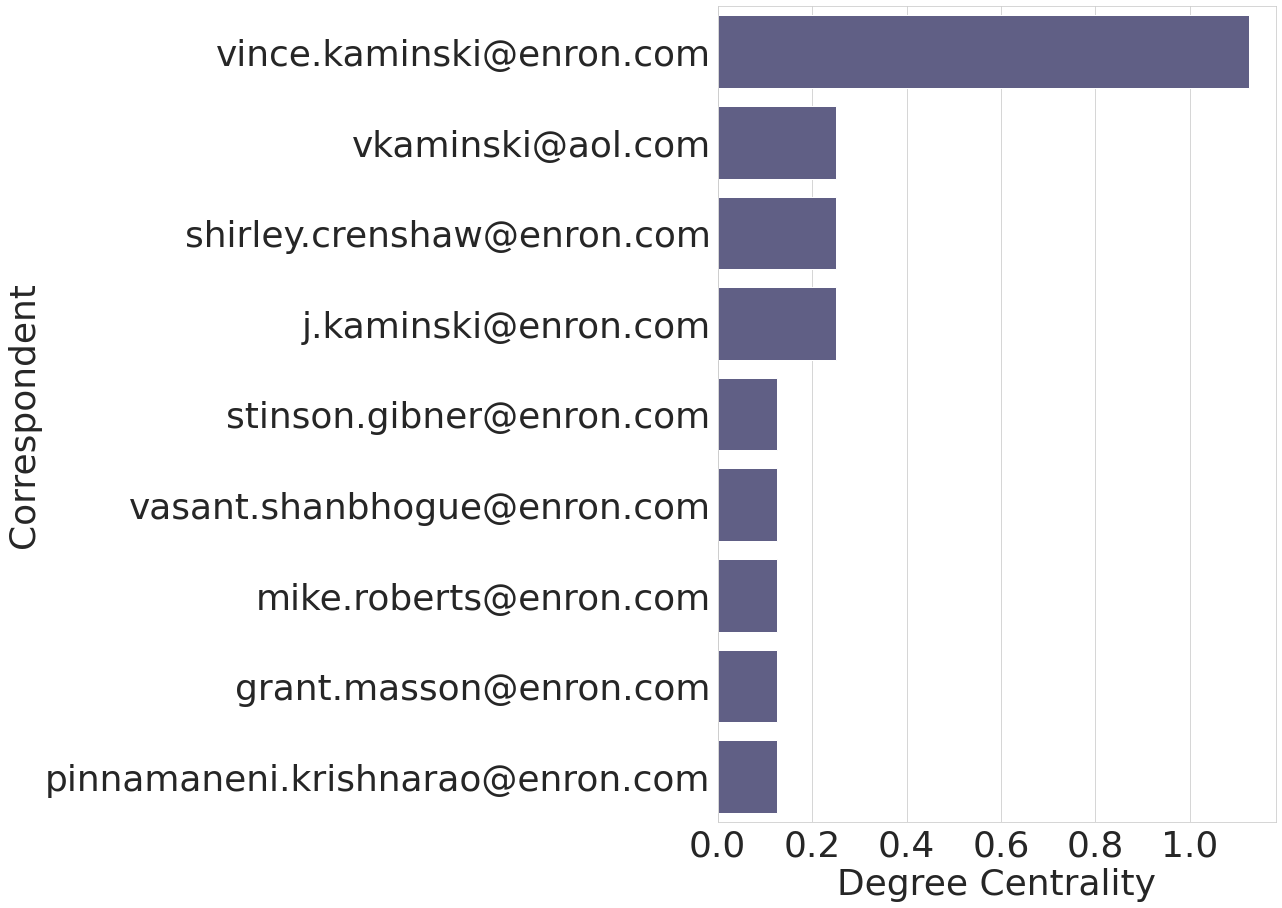

In [8]:
cent = nx.degree_centrality(G_top)
name = []
centrality = []

for key, value in cent.items():
    name.append(key)
    centrality.append(value)

cent = pd.DataFrame()    
cent['name'] = name
cent['centrality'] = centrality
cent = cent.sort_values(by='centrality', ascending=False)

fig_cent = plt.figure(figsize=(10, 15))
_ = sns.barplot(x='centrality', y='name', data=cent, orient='h', color='#5A598B')
_ = plt.xlabel('Degree Centrality')
_ = plt.ylabel('Correspondent')
#_ = plt.title('Top 10 Degree Centrality Scores in Vincent Kaminskis Network')
plt.rcParams.update({'font.size': 18})
plt.show()
fig_cent.savefig('../plots/kaminski_centrality.png')

### Top10 Correspondents WordCloud of Email Content

In [13]:
kaminski_parsed['To'] = kaminski_parsed['To'].str.strip(' \n\t')
kaminski_top10_content = kaminski_parsed[kaminski_parsed['To'].str.contains(
    'vince.kaminski.enron.com|j.kaminski@enron.com|shirley.crenshaw@enron.com|stinson.gibner@enron.com|vasant.shanbhogue@enron.com|mike.roberts@enron.com|grant.masson@enron.com|pinnamaneni.krishnarao@enron.com')]

In [9]:
content = ' '.join(review for review in kaminski_top10_content['content'])
stopwords = set(STOPWORDS)
stopwords.update(('Please', 'let', 'Vince', 'Kaminski', 'Subject', 'fwd','RE','FW','Hello', 'Forwarded','Shirley',
                 'Crenshaw', 'Stinson', 'Gibner', 'may', 'FYI', 'CC', 'well', 'NA', 'vkamins', 'utexas', 'edu',
                 'Thank', 'Thanks','PM', 'baylor', 'vasant', 'grant', 'masson', 'shanbhogue', 'Enron', 
                  'Original Message', 'Original', 'Message'))

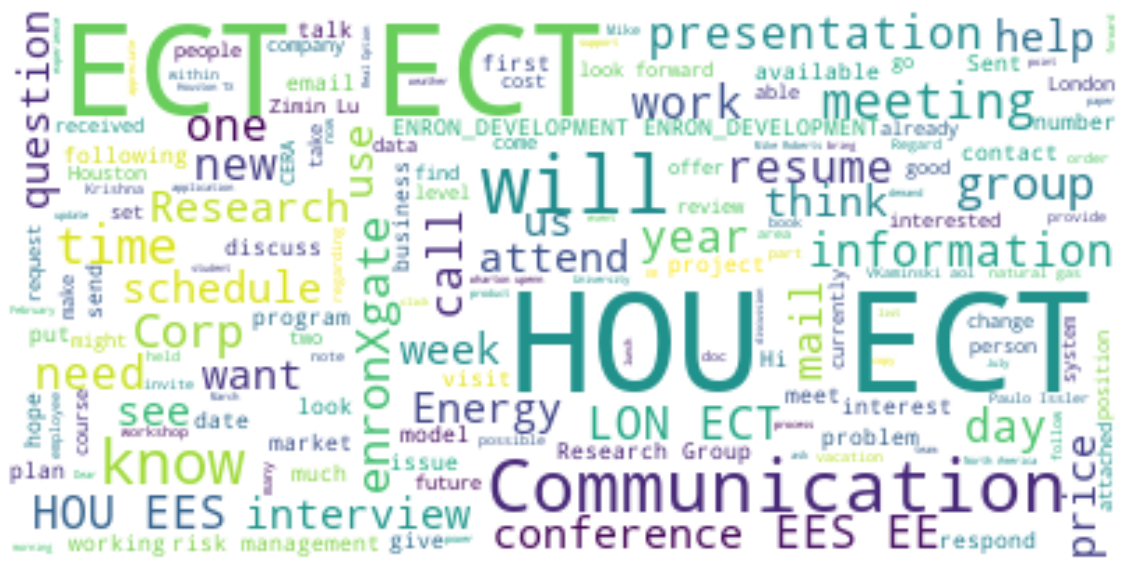

In [10]:
fig = plt.figure(figsize=(20, 20))
wc = WordCloud(max_font_size=50,
               max_words=200,
               stopwords=stopwords,
               background_color="white").generate(content)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
wc.to_file('../plots/kaminski_top10_wordcloud.png')

### WordCloud of Email Correspondence with Kenneth Lay and Jeffrey Skilling

The aforementioned individuals were key players in the Enron scandal. Kenneth Lay was a long-time CEO and Chairman of the Board while Jeffrey Skilling was long-time COO and CEO for a brief period.

In [14]:
kaminski_ls_content = kaminski_parsed[kaminski_parsed['To'].str.contains(
    'kenneth.lay@enron.com|jeff.skilling@enron.com')]

In [11]:
content_kls = ' '.join(review for review in kaminski_top10_content['content'])
stopwords_kls = set(STOPWORDS)
stopwords_kls.update(('Please', 'let', 'Vince', 'Kaminski', 'Subject', 'fwd','RE','FW','Hello', 'Forwarded',
                      'Shirley', 'Crenshaw', 'Stinson', 'Gibner', 'may', 'FYI', 'CC', 'well', 'NA', 'vkamins', 
                      'utexas', 'edu', 'Thank', 'Thanks','PM', 'baylor', 'vasant', 'grant', 'masson', 'shanbhogue',
                      'Enron', 'Original Message', 'Original', 'Message', 'Hi', 'Sent', 'HOU'))

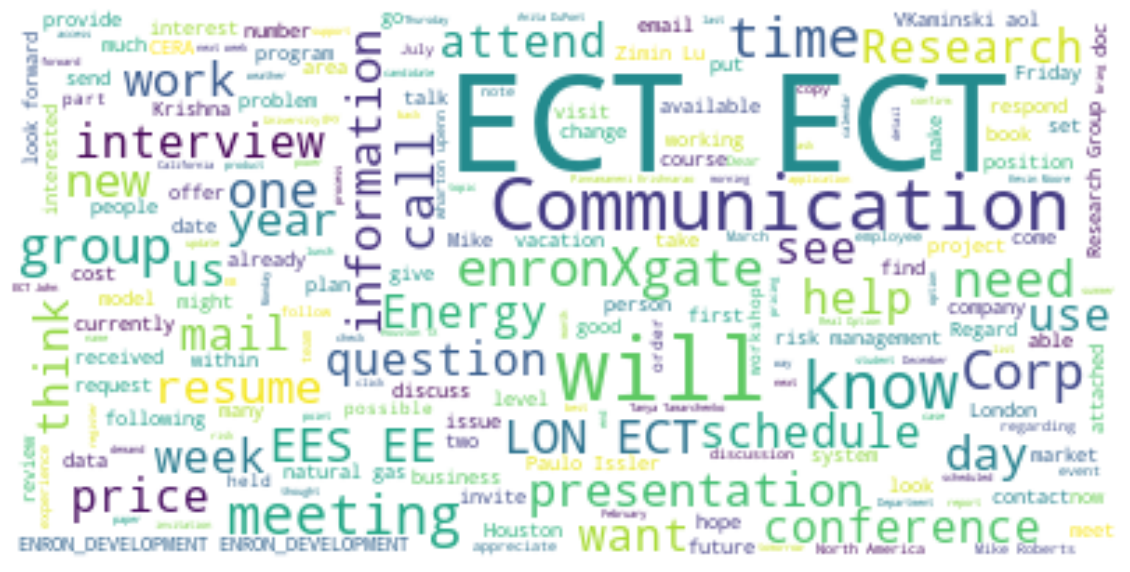

In [12]:
fig_kls = plt.figure(figsize=(20, 20))
wc_kls = WordCloud(max_font_size=50,
               max_words=200,
               stopwords=stopwords_kls,
               background_color="white").generate(content)

plt.imshow(wc_kls, interpolation="bilinear")
plt.axis("off")
wc_kls.to_file('../plots/kaminski_ls_wordcloud.png')